In [24]:
import pandas as pd
import torch
from transformers import pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [25]:
device = "mps" if torch.backends.mps.is_available() else "cpu" 
print(f"Device: {device}")

Device: mps


## Default Model

In [26]:
CNN_PATH =  '/Users/smutnuri/Documents/UVA/_Projects/Fall24/NLP/NLPRepo/data/manual/CNN_manual_labels.csv'
FOX_PATH = '/Users/smutnuri/Documents/UVA/_Projects/Fall24/NLP/NLPRepo/data/manual/Fox_manual_labels.csv'

TASK = 'zero-shot-classification'
MODEL_BASE = 'mlburnham/Political_DEBATE_base_v1.0'
MODEL_LARGE = 'mlburnham/Political_DEBATE_large_v1.0'

HYPTOTHESIS = "This text leans {}"
TEST_LABELS = ['left', 'neutral', 'right']

In [27]:
PIPE_BASE = pipeline(TASK, model=MODEL_BASE, device = device, batch_size = 32)
PIPE_LARGE = pipeline(TASK, model=MODEL_LARGE, device = device, batch_size = 32)

In [28]:
def process_and_predict(filepath, model_pipe, hypothesis, test_labels, title):

    data = pd.read_csv(filepath)

    pipe = model_pipe
    
    def get_prediction(comment):
        result = pipe(comment, test_labels, hypothesis_template=hypothesis, multi_label=False)
        return result['labels'][0]
    
    data['pred_leaning'] = data['comment'].apply(get_prediction)
    
    cm = confusion_matrix(data['leaning'], data['pred_leaning'], labels=test_labels)
    
    print("Classification Report:")
    print(classification_report(data['leaning'], data['pred_leaning'], labels=test_labels))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {title}")
    plt.show()

Classification Report:
              precision    recall  f1-score   support

        left       0.75      0.40      0.52        15
     neutral       0.33      0.20      0.25         5
       right       0.37      0.70      0.48        10

    accuracy                           0.47        30
   macro avg       0.48      0.43      0.42        30
weighted avg       0.55      0.47      0.46        30



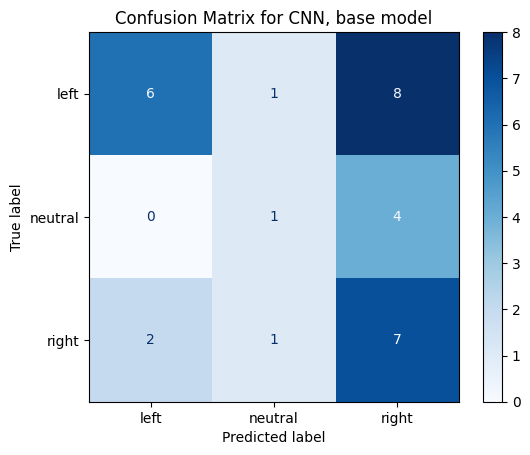

In [29]:
process_and_predict(CNN_PATH, PIPE_BASE, HYPTOTHESIS, TEST_LABELS, 'CNN, base model')

Classification Report:
              precision    recall  f1-score   support

        left       0.73      0.73      0.73        15
     neutral       0.00      0.00      0.00         5
       right       0.62      0.80      0.70        10

    accuracy                           0.63        30
   macro avg       0.45      0.51      0.48        30
weighted avg       0.57      0.63      0.60        30



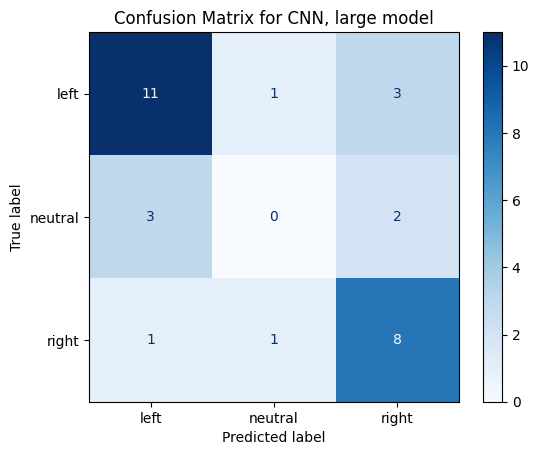

In [30]:
process_and_predict(CNN_PATH, PIPE_LARGE, HYPTOTHESIS, TEST_LABELS, 'CNN, large model')

Classification Report:
              precision    recall  f1-score   support

        left       0.50      0.57      0.53         7
     neutral       0.67      0.33      0.44         6
       right       0.79      0.88      0.83        17

    accuracy                           0.70        30
   macro avg       0.65      0.60      0.60        30
weighted avg       0.70      0.70      0.69        30



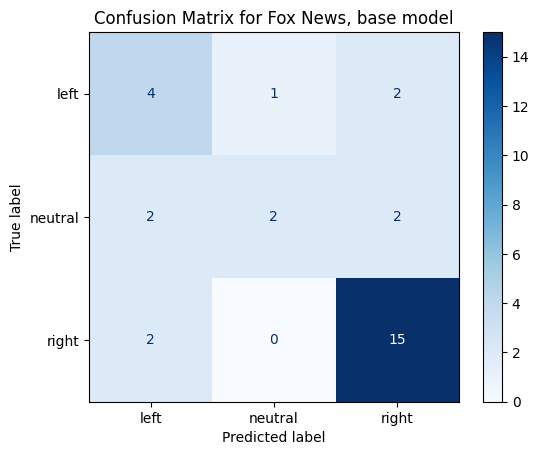

In [31]:
process_and_predict(FOX_PATH, PIPE_BASE, HYPTOTHESIS, TEST_LABELS, 'Fox News, base model')

Classification Report:
              precision    recall  f1-score   support

        left       0.64      1.00      0.78         7
     neutral       1.00      0.50      0.67         6
       right       0.88      0.82      0.85        17

    accuracy                           0.80        30
   macro avg       0.84      0.77      0.76        30
weighted avg       0.84      0.80      0.80        30



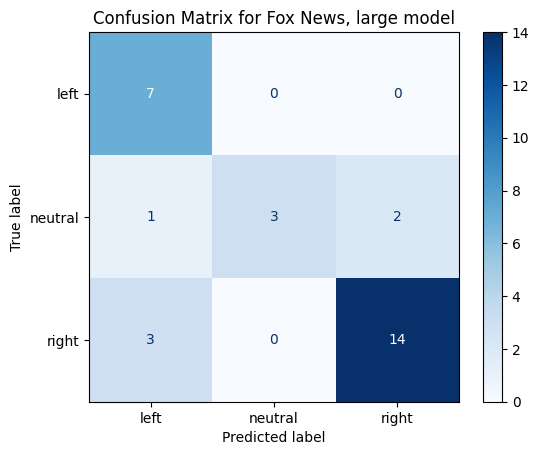

In [32]:
process_and_predict(FOX_PATH, PIPE_LARGE, HYPTOTHESIS, TEST_LABELS, 'Fox News, large model')

## Custom Model

In [36]:
CUSTOM_MODEL = './few_shot'
CUSTOM_PATH = '/Users/smutnuri/Documents/UVA/_Projects/Fall24/NLP/NLPRepo/data/manual/train.csv'

CUST_HYPTOTHESIS = "{}"
CUST_TEST_LABELS = ['This text leans left', 'This text leans neutral', 'This text leans right']

CUSTOM_PIPE = pipeline(TASK, model=CUSTOM_MODEL, device = device, batch_size = 32)

In [37]:
def cust_process_and_predict(filepath, model_pipe, hypothesis, test_labels):

    data = pd.read_csv(filepath)

    pipe = model_pipe
    
    def get_prediction(comment):
        result = pipe(comment, test_labels, hypothesis_template=hypothesis, multi_label=False)
        return result['labels'][0]
    
    data['pred_leaning'] = data['comment'].apply(get_prediction)
    
    print(data)

In [38]:
cust_process_and_predict(CUSTOM_PATH, CUSTOM_PIPE, CUST_HYPTOTHESIS, CUST_TEST_LABELS)

                                              comment original_label  \
0   C’mon man, Libdersl Justice Ketanji Brown dest...          right   
1   1/5 of the world’s wheat comes from Ukraine. T...           left   
2   I'm proud to be TEXAN. just send all the 8 mil...          right   
3   9trillon to debt! Good job Donnie dumdum. Obam...           left   
4   Didn't Trump say he would debate Biden in Sept...          right   
5   Good question. As long as you’re investigating...          right   
6   Trump accidentally revealed himself in his so-...           left   
7   here we go...no one i mean no one knows about ...          right   
8   notice how they only try and make him look bad...          right   
9   Exactly what I told everyone he would say!! Li...          right   
10  If you believe anything Putin says, especially...           left   
11  First, Israel is NOT our ally. Second, Israel ...          right   
12  She didn't quit, in spite of knowing who and w...        neu